# Data Analytics (18899) Assignment 1
### Author: Christopher Dare
### Andrew id: cdare
### Libraries used:
1. Numpy
2. Pandas
3. Matplotlib
4. Jupyter
5. Seaborn

In [1]:
""" import modules """
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

## Q. 1 and 3

## Reading the datasets: 2017 weather and electricity consumption data for France

Functions for loading and preprocessing data

In [2]:
def load_france_weather_data():
    # load and preprocess France 2017 weather data. Date format was "%m/%d/%Y"
    df = pd.read_csv('data/Paris_weather_data_2017.csv')
    date_parse_string = "%m/%d/%Y"
    df["Date"] = pd.to_datetime(df['Date'].astype(str),format=date_parse_string)
#     df.drop(['Events'])
#     events_encoder = LabelEncoder()
#     df['Events_encoded'] = events_encoder.fit_transform(df['Events'].astype(str))
    return df

def load_france_electricity_data():
    # load and preprocess France 2017 electricity data. Date format was "%d/%m/%Y"
    # data partially preprocessed in excel. (Language translation)
    df = pd.read_csv('data/France_daily_electricity_consumption_2017.csv')
    date_parse_string = "%d/%m/%Y"
    df["Date"] = pd.to_datetime(df['Date'].astype(str),format=date_parse_string)
    return df

### Load weather and electricity datasets

In [3]:
""" load the weather dataset """
france_weather_data = load_france_weather_data()
print("France weather data for the year 2017 is given as")
france_weather_data.head(5)

France weather data for the year 2017 is given as


,Date,high Temp (°C),avg Temp (°C),low Temp (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),...,avg Sea Level Press (hPa),low Sea Level Press (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),high Gust Wind (km/h),sum Precip. (mm),Events
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,...,1023,1020,7.0,3.0,0.0,10,6,-,0,Fog
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,...,1025,1022,14.0,4.0,0.0,16,6,-,2,"Fog , Rain , Snow"
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,...,1030,1028,7.0,2.0,0.0,14,6,-,0,Fog
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,...,1025,1023,19.0,9.0,3.0,23,14,-,2,Rain
4,2017-01-05,7,3,1,2,0,-2,93,79,59,...,1032,1027,19.0,12.0,10.0,14,11,-,0,NaN


In [4]:
france_electricity_data = load_france_electricity_data()
print("France electricity consumption data for the year 2017 is given from the dataset as")
france_electricity_data.head(5)

France electricity consumption data for the year 2017 is given from the dataset as


,Date,Type of data,Daily energy consumption(MWh)
0,2017-01-01,Final,1652084
1,2017-01-02,Final,1768332
2,2017-01-03,Final,1886120
3,2017-01-04,Final,1923775
4,2017-01-05,Final,1887470


## Modelling weather

In [5]:
""" ref dataset with a shorter identifier """
df = pd.DataFrame(france_weather_data)

In [6]:
""" check for nans """
def peek_nans(dataset):    
    sum_nans = dataset.isnull().sum()
    print("Count of missing values in the dataset: \n")
    return sum_nans

In [7]:
peek_nans(df)

Count of missing values in the dataset: 



Date                            0
high Temp (°C)                  0
avg Temp (°C)                   0
low Temp (°C)                   0
high Dew Point (°C)             0
avg Dew Point (°C)              0
low Dew Point (°C)              0
high Humidity (%)               0
avg Humidity (%)                0
low Humidity (%)                0
high Sea Level Press (hPa)      0
avg Sea Level Press (hPa)       0
low Sea Level Press (hPa)       0
high Visibility (km)            2
avg Visibility (km)             2
low Visibility (km)             2
high Wind (km/h)                0
avg Wind (km/h)                 0
high Gust Wind (km/h)           0
sum Precip. (mm)                0
Events                        139
dtype: int64

In [8]:
# preprocessing

df.interpolate(inplace=True, method='linear')
peek_nans(df)

Count of missing values in the dataset: 



Date                            0
high Temp (°C)                  0
avg Temp (°C)                   0
low Temp (°C)                   0
high Dew Point (°C)             0
avg Dew Point (°C)              0
low Dew Point (°C)              0
high Humidity (%)               0
avg Humidity (%)                0
low Humidity (%)                0
high Sea Level Press (hPa)      0
avg Sea Level Press (hPa)       0
low Sea Level Press (hPa)       0
high Visibility (km)            0
avg Visibility (km)             0
low Visibility (km)             0
high Wind (km/h)                0
avg Wind (km/h)                 0
high Gust Wind (km/h)           0
sum Precip. (mm)                0
Events                        139
dtype: int64

## Q.2 Correlation matrix

Calculate correlation matrix between all wealther variables. Show as heatmap

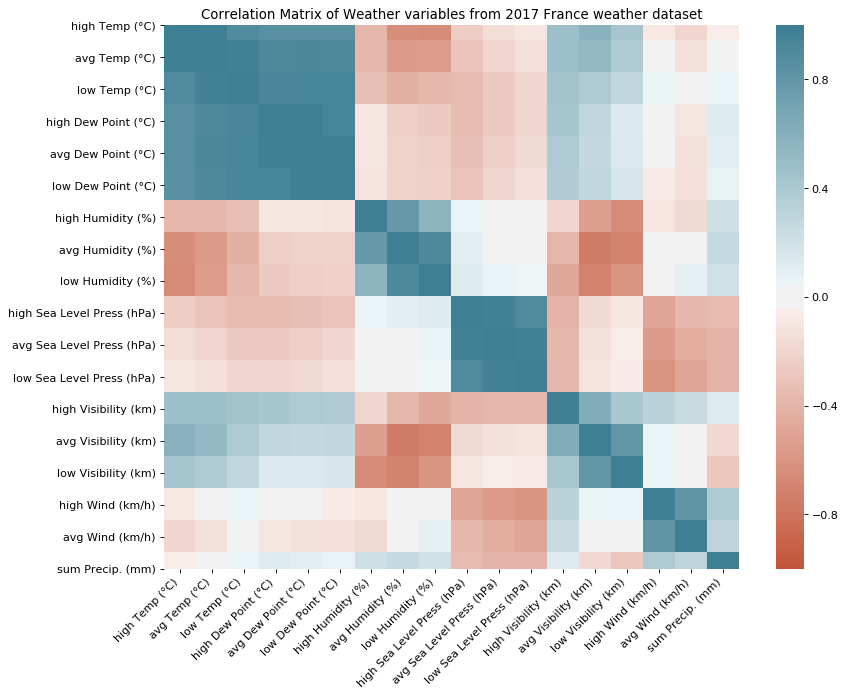

In [9]:
france_weather_vars_cor = df.corr()
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')

ax = sns.heatmap(
    france_weather_vars_cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
ax.title.set_text('Correlation Matrix of Weather variables from 2017 France weather dataset')

In [10]:
""" dereference df """
df = None

Import 2017 electricty consumption data for France. Data transformed with excel: 
1. Removed blank line separators
2. Translated from French to English

already checked during transform with excel - none found...but running just in case the data source changes

In [11]:
""" already checked during transform with excel - none found...but running just in case the data source changes """
peek_nans(france_electricity_data)

Count of missing values in the dataset: 



Date                             0
Type of data                     0
Daily energy consumption(MWh)    0
dtype: int64

## Q.4

In [12]:
""" synchronize dates by merging essential columns on 'Date' """
# weather_data_merge = france_weather_data[['Date', 'avg Temp (°C)']]
weather_data_merge = france_weather_data
electricity_data_merge = france_electricity_data[['Date', 'Daily energy consumption(MWh)']]
df = weather_data_merge.merge(on='Date', right=electricity_data_merge)
df.head(5)

,Date,high Temp (°C),avg Temp (°C),low Temp (°C),high Dew Point (°C),avg Dew Point (°C),low Dew Point (°C),high Humidity (%),avg Humidity (%),low Humidity (%),...,low Sea Level Press (hPa),high Visibility (km),avg Visibility (km),low Visibility (km),high Wind (km/h),avg Wind (km/h),high Gust Wind (km/h),sum Precip. (mm),Events,Daily energy consumption(MWh)
0,2017-01-01,0,-3,-5,-1,-3,-6,100,94,86,...,1020,7.0,3.0,0.0,10,6,-,0,Fog,1652084
1,2017-01-02,2,0,-2,1,1,-1,100,95,88,...,1022,14.0,4.0,0.0,16,6,-,2,"Fog , Rain , Snow",1768332
2,2017-01-03,1,0,-1,1,0,-1,100,95,88,...,1028,7.0,2.0,0.0,14,6,-,0,Fog,1886120
3,2017-01-04,6,2,-1,4,1,-1,100,87,71,...,1023,19.0,9.0,3.0,23,14,-,2,Rain,1923775
4,2017-01-05,7,3,1,2,0,-2,93,79,59,...,1027,19.0,12.0,10.0,14,11,-,0,NaN,1887470


## Q.5

7. Visualize a scatter plot of the data.

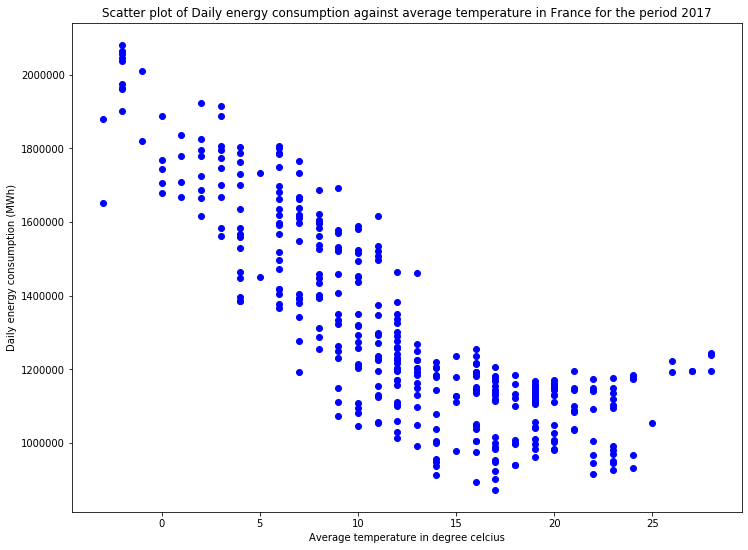

<Figure size 960x720 with 0 Axes>

In [13]:
# scatter plot of
# def plot_energy_avg_temp(df):    
x = df['avg Temp (°C)']
y = df['Daily energy consumption(MWh)']
N = 45
c = np.random.randint(1, 5, size=N)
s = np.random.randint(10, 220, size=N)

fig, ax = plt.subplots(figsize=(12,9))


scatter = ax.scatter(x, y, c='blue')
ax.title.set_text('Scatter plot of Daily energy consumption against average temperature in France for the period 2017')
plt.xlabel('Average temperature in degree celcius')
plt.ylabel('Daily energy consumption (MWh)')
# plot_energy_avg_temp(df)
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.show()

### Comments on the plot above
The relationship between average temperature and electricity consumption appears to be polynomial.
Key questions:
1. Why is this so?
2. What variables explain this?
3. How can I find them and model electricity consumption in France

### Fitting a quadratic model

In [14]:
def transform_xy(x,y):
    my_set = np.ndarray(shape=(2,365))
    my_set[0] = x.values
    my_set[1] = y.values
    my_set = my_set[my_set[:, 0].argsort()]
    x_ = my_set[0]
    y_ = my_set[1]
    return X_, y_

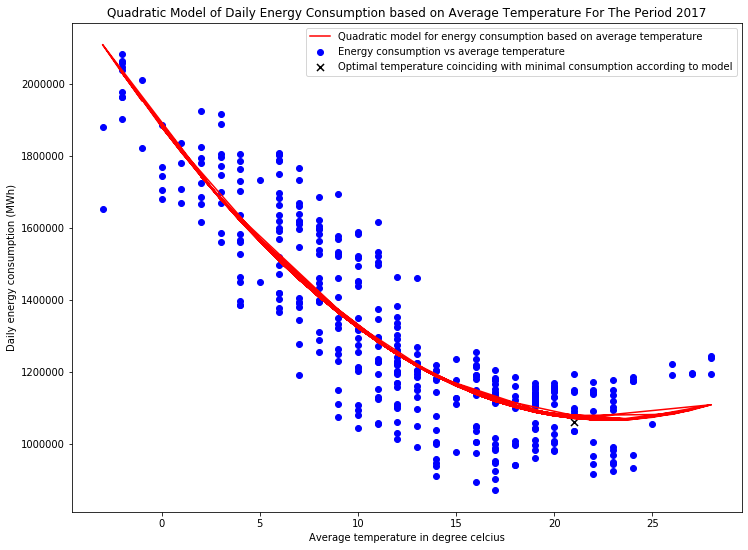

In [15]:
z = np.polyfit(x, y, 2)
p = np.poly1d(z)
x_ = x

y_ = p(x)



fig, ax = plt.subplots(figsize=(12,9))


ax.scatter(x, y, c='blue', label='Energy consumption vs average temperature')
ax.plot(x_, y_, c='red', label='Quadratic model for energy consumption based on average temperature')
# plot the minimum
ax.scatter(21,1060000, c='black', marker='x', s=[50], label='Optimal temperature coinciding with minimal consumption according to model')
ax.title.set_text('Quadratic Model of Daily Energy Consumption based on Average Temperature For The Period 2017')
plt.xlabel('Average temperature in degree celcius')
plt.ylabel('Daily energy consumption (MWh)')

plt.legend()
plt.show()


## Q.7 - Stepwise Regression

In [16]:
# implement stepwise regression. code from 

import statsmodels.api as sm


def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    print('Implementing stepwise model for features \n{0}\n\n'.format(X.columns))
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            print("Model added feature  '{:30}' with p-value '{:.6}''".format(best_feature, best_pval))

        if not changed:
            break

    return included, model.summary()

In [17]:
# build my features. Set dependent variable (output)
df.dropna(inplace=True)
features = df[df.columns.difference(['Daily energy consumption(MWh)','Events', 'Events_encoded','high Gust Wind (km/h)', 'Date', 'Events'])]

output = df['Daily energy consumption(MWh)']
# wind gust rejected because it contains several NaNs characterized by dashes. Alternative is to interpolate that data.
features.values

array([[-3.000e+00,  9.400e+01,  1.023e+03, ..., -5.000e+00,  0.000e+00,
         0.000e+00],
       [ 1.000e+00,  9.500e+01,  1.025e+03, ..., -2.000e+00,  0.000e+00,
         2.000e+00],
       [ 0.000e+00,  9.500e+01,  1.030e+03, ..., -1.000e+00,  0.000e+00,
         0.000e+00],
       ...,
       [ 2.000e+00,  8.500e+01,  1.006e+03, ..., -1.000e+00,  3.000e+00,
         1.200e+01],
       [ 1.000e+01,  8.700e+01,  1.006e+03, ...,  6.000e+00,  3.000e+00,
         3.000e+00],
       [ 8.000e+00,  7.400e+01,  1.007e+03, ...,  9.000e+00,  6.000e+00,
         2.000e+00]])

In [18]:
features_selected, sr_model_summary = forward_regression(features,output,0.05)

Implementing stepwise model for features 
Index(['avg Dew Point (°C)', 'avg Humidity (%)', 'avg Sea Level Press (hPa)',
       'avg Temp (°C)', 'avg Visibility (km)', 'avg Wind (km/h)',
       'high Dew Point (°C)', 'high Humidity (%)',
       'high Sea Level Press (hPa)', 'high Temp (°C)', 'high Visibility (km)',
       'high Wind (km/h)', 'low Dew Point (°C)', 'low Humidity (%)',
       'low Sea Level Press (hPa)', 'low Temp (°C)', 'low Visibility (km)',
       'sum Precip. (mm)'],
      dtype='object')




/home/chris/anaconda3/envs/diaml/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Model added feature  'high Temp (°C)                ' with p-value '5.23237e-63''
Model added feature  'high Visibility (km)          ' with p-value '0.0116307''
Model added feature  'low Temp (°C)                 ' with p-value '0.0289208''
Model added feature  'low Humidity (%)              ' with p-value '0.00449393''
Model added feature  'avg Dew Point (°C)            ' with p-value '0.000264212''
Model added feature  'low Sea Level Press (hPa)     ' with p-value '0.00767033''


In [19]:
sr_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Daily energy consumption(MWh)   R-squared:                       0.764
Model:                                       OLS   Adj. R-squared:                  0.757
Method:                            Least Squares   F-statistic:                     101.0
Date:                           Mon, 27 Jan 2020   Prob (F-statistic):           7.36e-65
Time:                                   23:32:51   Log-Likelihood:                -2990.1
No. Observations:                            226   AIC:                             5996.
Df Residuals:                                218   BIC:                             6024.
Df Model:                                      7                                         
Covariance Type:                       nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                      4.204e+06   1.08e+06      3.909      0.000    2.08e+06    6.32e+06
high Temp (°C)             6346.2102   6618.881      0.959      0.339   -6698.979    1.94e+04
high Visibility (km)      -1378.9272   2352.432     -0.586      0.558   -6015.349    3257.494
low Temp (°C)              -551.5810   5685.783     -0.097      0.923   -1.18e+04    1.07e+04
low Humidity (%)           7342.4250   1475.730      4.975      0.000    4433.900    1.03e+04
avg Dew Point (°C)        -4.075e+04   1.03e+04     -3.956      0.000    -6.1e+04   -2.04e+04
low Sea Level Press (hPa) -2881.2717   1047.141     -2.752      0.006   -4945.088    -817.455
avg Visibility (km)       -6371.7519   4310.252     -1.478      0.141   -1.49e+04    2123.349
==============================================================================
Omnibus:                        5.787   Durbin-Watson:                   1.110
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                4.382
Skew:                          -0.222   Prob(JB):                        0.112
Kurtosis:                       2.483   Cond. No.                     1.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Q.8 Stepwise with square of features. (Enforce mutual information)

In [20]:
new_features = features[features_selected]

In [21]:
sq_features = features**2
sq_features = sq_features.add_suffix("_sq")
sq_features

,avg Dew Point (°C)_sq,avg Humidity (%)_sq,avg Sea Level Press (hPa)_sq,avg Temp (°C)_sq,avg Visibility (km)_sq,avg Wind (km/h)_sq,high Dew Point (°C)_sq,high Humidity (%)_sq,high Sea Level Press (hPa)_sq,high Temp (°C)_sq,high Visibility (km)_sq,high Wind (km/h)_sq,low Dew Point (°C)_sq,low Humidity (%)_sq,low Sea Level Press (hPa)_sq,low Temp (°C)_sq,low Visibility (km)_sq,sum Precip. (mm)_sq
0,9,8836,1046529,9,9.0,36,1,10000,1060900,0,49.0,100,36,7396,1040400,25,0.0,0
1,1,9025,1050625,0,16.0,36,1,10000,1060900,4,196.0,256,1,7744,1044484,4,0.0,4
2,0,9025,1060900,0,4.0,36,1,10000,1065024,1,49.0,196,1,7744,1056784,1,0.0,0
3,1,7569,1050625,4,81.0,196,16,10000,1056784,36,361.0,529,1,5041,1046529,1,9.0,4
6,16,7056,1071225,9,36.0,25,1,10000,1079521,1,361.0,196,81,3249,1065024,49,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,9,6400,1006009,36,196.0,324,25,8649,1018081,64,961.0,841,4,4489,980100,9,49.0,16
360,4,6724,974169,16,144.0,576,25,8649,996004,36,961.0,1521,4,3600,964324,9,36.0,16
362,4,7225,1012036,9,144.0,169,36,10000,1024144,64,961.0,1024,1,2916,1000000,1,9.0,144
363,100,7569,1012036,100,81.0,361,144,10000,1022121,196,361.0,1024,16,5329,1000000,36,9.0,9


In [22]:
expanded_features = features.merge(right=sq_features, left_index=True, right_index=True)

Perform stepwise regression on the expanded set of features

In [23]:
features_selected, sr_model_summary = forward_regression(expanded_features,output,0.05)
sr_model_summary

Implementing stepwise model for features 
Index(['avg Dew Point (°C)', 'avg Humidity (%)', 'avg Sea Level Press (hPa)',
       'avg Temp (°C)', 'avg Visibility (km)', 'avg Wind (km/h)',
       'high Dew Point (°C)', 'high Humidity (%)',
       'high Sea Level Press (hPa)', 'high Temp (°C)', 'high Visibility (km)',
       'high Wind (km/h)', 'low Dew Point (°C)', 'low Humidity (%)',
       'low Sea Level Press (hPa)', 'low Temp (°C)', 'low Visibility (km)',
       'sum Precip. (mm)', 'avg Dew Point (°C)_sq', 'avg Humidity (%)_sq',
       'avg Sea Level Press (hPa)_sq', 'avg Temp (°C)_sq',
       'avg Visibility (km)_sq', 'avg Wind (km/h)_sq',
       'high Dew Point (°C)_sq', 'high Humidity (%)_sq',
       'high Sea Level Press (hPa)_sq', 'high Temp (°C)_sq',
       'high Visibility (km)_sq', 'high Wind (km/h)_sq',
       'low Dew Point (°C)_sq', 'low Humidity (%)_sq',
       'low Sea Level Press (hPa)_sq', 'low Temp (°C)_sq',
       'low Visibility (km)_sq', 'sum Precip. (mm)_sq'],
    

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Daily energy consumption(MWh)   R-squared:                       0.788
Model:                                       OLS   Adj. R-squared:                  0.782
Method:                            Least Squares   F-statistic:                     135.6
Date:                           Mon, 27 Jan 2020   Prob (F-statistic):           7.09e-71
Time:                                   23:32:52   Log-Likelihood:                -2978.3
No. Observations:                            226   AIC:                             5971.
Df Residuals:                                219   BIC:                             5995.
Df Model:                                      6                                         
Covariance Type:                       nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   1.481e+06   1.25e+05     11.840      0.000    1.23e+06    1.73e+06
high Temp (°C)         -2.907e+04   9045.743     -3.214      0.002   -4.69e+04   -1.12e+04
high Temp (°C)_sq        808.7988    152.059      5.319      0.000     509.113    1108.484
low Humidity (%)        5729.4183   1297.538      4.416      0.000    3172.158    8286.679
avg Dew Point (°C)     -2.991e+04   7149.897     -4.183      0.000    -4.4e+04   -1.58e+04
high Wind (km/h)_sq       57.0831     21.855      2.612      0.010      14.009     100.157
avg Visibility (km)_sq  -196.6261    123.726     -1.589      0.113    -440.473      47.221
==============================================================================
Omnibus:                        3.168   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                3.238
Skew:                          -0.276   Prob(JB):                        0.198
Kurtosis:                       2.801   Cond. No.                     1.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Q.9 Stepwise iteration 3 - Add  Dummy variables

In [24]:
import datetime as dt
# datetime.datetime.today() 
# datetime.datetime.today().weekday()

In [25]:
df['dummy_date_var'] = df['Date'].dt.weekday_name
# for index, row in df.iterrows():
#     row['dummy_date_var'] = row['Date'].weekday()
dummies = pd.get_dummies(df['dummy_date_var'], drop_first=True)

In [26]:
df = pd.concat([df,dummies],axis=1)


In [27]:
# transformed_df = pd.DataFrame(df)
# df.columns
features = df[df.columns.difference(['dummy_date_var','Daily energy consumption(MWh)','Events', 'Events_encoded','high Gust Wind (km/h)', 'Date', 'Events'])]
new_features = features.merge(right=sq_features, left_index=True, right_index=True) 

In [28]:
features_selected, sr_model_summary = forward_regression(new_features,output,0.05)
sr_model_summary

Implementing stepwise model for features 
Index(['Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'avg Dew Point (°C)', 'avg Humidity (%)', 'avg Sea Level Press (hPa)',
       'avg Temp (°C)', 'avg Visibility (km)', 'avg Wind (km/h)',
       'high Dew Point (°C)', 'high Humidity (%)',
       'high Sea Level Press (hPa)', 'high Temp (°C)', 'high Visibility (km)',
       'high Wind (km/h)', 'low Dew Point (°C)', 'low Humidity (%)',
       'low Sea Level Press (hPa)', 'low Temp (°C)', 'low Visibility (km)',
       'sum Precip. (mm)', 'avg Dew Point (°C)_sq', 'avg Humidity (%)_sq',
       'avg Sea Level Press (hPa)_sq', 'avg Temp (°C)_sq',
       'avg Visibility (km)_sq', 'avg Wind (km/h)_sq',
       'high Dew Point (°C)_sq', 'high Humidity (%)_sq',
       'high Sea Level Press (hPa)_sq', 'high Temp (°C)_sq',
       'high Visibility (km)_sq', 'high Wind (km/h)_sq',
       'low Dew Point (°C)_sq', 'low Humidity (%)_sq',
       'low Sea Level Press (hPa)_sq', 'low T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     Daily energy consumption(MWh)   R-squared:                       0.883
Model:                                       OLS   Adj. R-squared:                  0.876
Method:                            Least Squares   F-statistic:                     122.9
Date:                           Mon, 27 Jan 2020   Prob (F-statistic):           5.40e-91
Time:                                   23:32:54   Log-Likelihood:                -2911.2
No. Observations:                            226   AIC:                             5850.
Df Residuals:                                212   BIC:                             5898.
Df Model:                                     13                                         
Covariance Type:                       nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.725e+06   8.79e+04     19.631      0.000    1.55e+06     1.9e+06
high Temp (°C)        -3.505e+04   6565.368     -5.339      0.000    -4.8e+04   -2.21e+04
high Temp (°C)_sq       681.8009    174.190      3.914      0.000     338.435    1025.167
Sunday                -2.076e+05   2.02e+04    -10.297      0.000   -2.47e+05   -1.68e+05
Saturday              -1.661e+05   1.93e+04     -8.594      0.000   -2.04e+05   -1.28e+05
low Temp (°C)         -3.737e+04   6597.044     -5.665      0.000   -5.04e+04   -2.44e+04
low Humidity (%)       3388.4809    883.378      3.836      0.000    1647.151    5129.811
high Wind (km/h)_sq      79.6631     19.698      4.044      0.000      40.834     118.493
Monday                -6.537e+04   2.13e+04     -3.062      0.002   -1.07e+05   -2.33e+04
low Temp (°C)_sq       1219.7246    331.884      3.675      0.000     565.510    1873.939
avg Dew Point (°C)_sq  -952.7817    328.681     -2.899      0.004   -1600.684    -304.880
low Dew Point (°C)      1.27e+04   5947.003      2.135      0.034     972.543    2.44e+04
sum Precip. (mm)      -4637.9612   2345.098     -1.978      0.049   -9260.658     -15.265
Thursday               4161.2801   2.06e+04      0.202      0.840   -3.64e+04    4.47e+04
==============================================================================
Omnibus:                        2.764   Durbin-Watson:                   1.143
Prob(Omnibus):                  0.251   Jarque-Bera (JB):                2.690
Skew:                          -0.112   Prob(JB):                        0.261
Kurtosis:                       3.485   Cond. No.                     9.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Q.10 Issues of over-fitting

The correlation matrix is a great way to check whether or not the model is overfitting. If we have features that are dependent on each other and found in the model, then we should have reason to suspect over-fitting. In this case however, we see that it is not a problem. Variables such as visibility are not accounted for in the predictive model - and well so because they depend on others such as humidity - which obviously as a higher statistical significance.(humidity in cold regions affects visibility)
### Approaches to avoid over-fitting:
Our lecturer, Prof. McSharry, has taught us from the previous course on “Data, Inference and Applied Machine Learning”, some approaches to avoid over-ftting:
1. Cross-validating the model by splitting the training dataset into training and testing sets, then using the test data set to evaluate the accuracy of the model so as to fine tune the parameters.
2. Training with more data. The more the data, the better the model can generalize to other cases.
